In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("FatihEvFiyatları.csv",sep = ";")

In [80]:
# İlk 5 satırı görüntüleme
df.head()

# Temel istatistiksel özet
df.describe()

# Veri tiplerini kontrol etme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   alan       39 non-null     int64
 1   odasayisi  39 non-null     int64
 2   binayasi   39 non-null     int64
 3   fiyat      39 non-null     int64
dtypes: int64(4)
memory usage: 1.3 KB


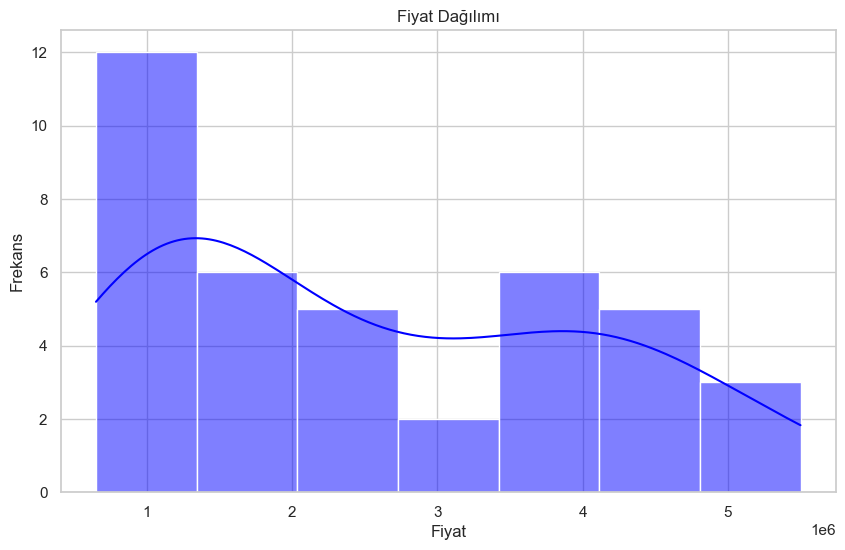

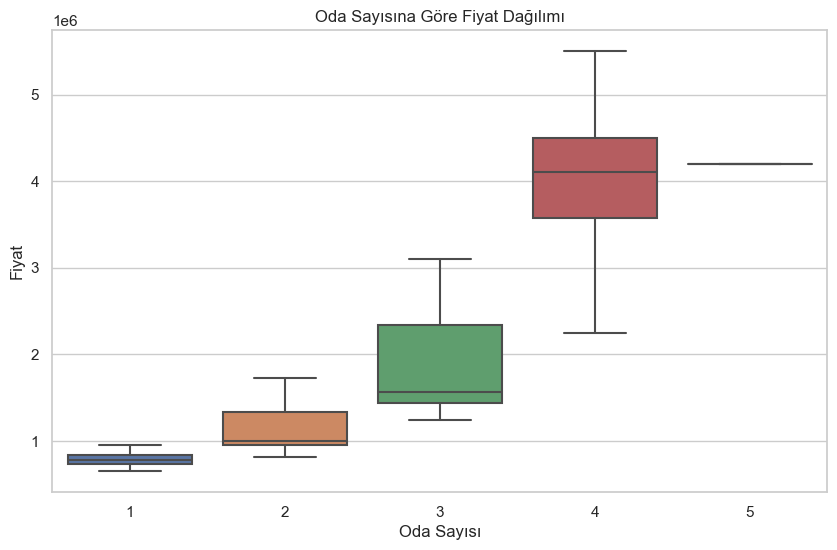

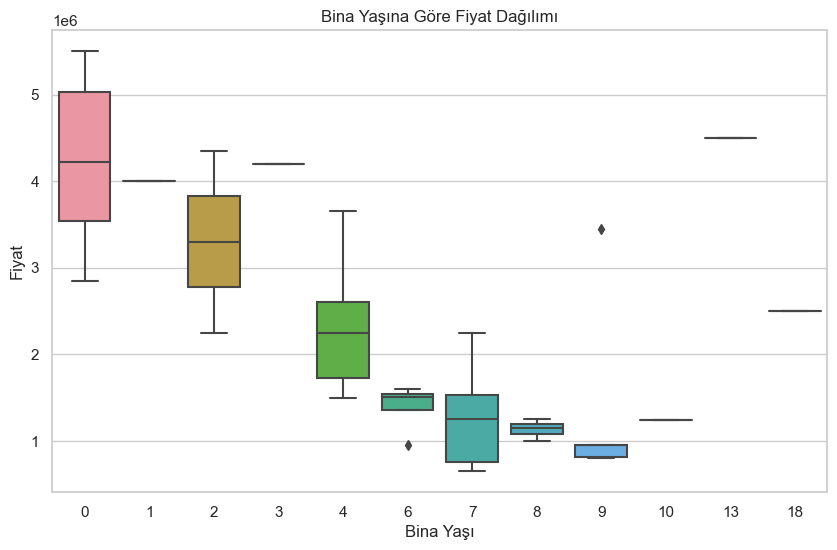

In [81]:
# Fiyatların dağılımını gösteren histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['fiyat'], kde=True, color='blue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

# Oda sayısına göre fiyatların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='odasayisi', y='fiyat', data=df)
plt.title('Oda Sayısına Göre Fiyat Dağılımı')
plt.xlabel('Oda Sayısı')
plt.ylabel('Fiyat')
plt.show()

# Binayaşına göre fiyatların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='binayasi', y='fiyat', data=df)
plt.title('Bina Yaşına Göre Fiyat Dağılımı')
plt.xlabel('Bina Yaşı')
plt.ylabel('Fiyat')
plt.show()

In [82]:
# Oda sayısının ve bina yaşının çarpımını yeni bir özellik olarak ekleyelim
df['odasayi_binayasi'] = df['odasayisi'] * df['binayasi']

# Fiyatın logaritmasını alarak yeni bir özellik ekleyelim
df['log_fiyat'] = np.log(df['fiyat'])

# Yeni özellikleri görüntüleyelim
df[['odasayi_binayasi', 'log_fiyat']].head()

,odasayi_binayasi,log_fiyat
0,8,14.363632
1,7,13.534473
2,36,15.053885
3,9,13.592367
4,24,14.038654


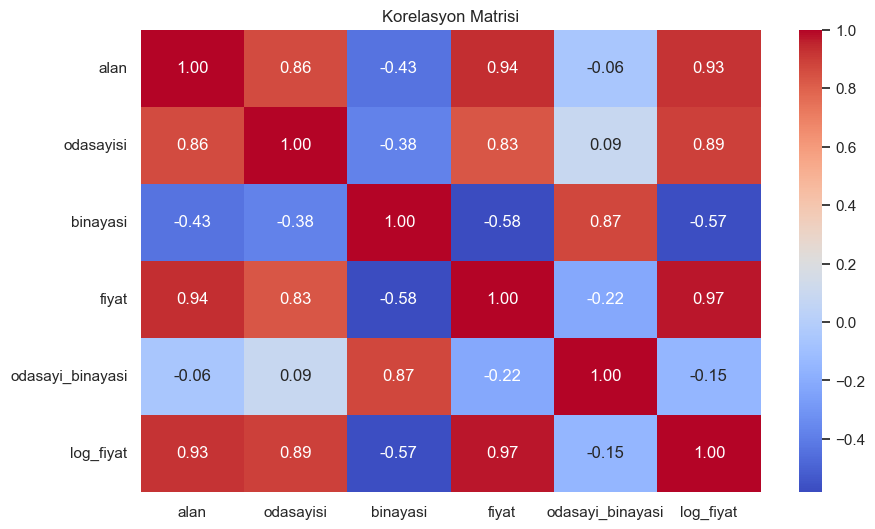

In [83]:
# Korelasyon matrisini oluşturma
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

In [84]:
# Modeli oluşturma ve eğitme
reg = LinearRegression()

# Eğitim verilerini hazırlama
X = df[['alan', 'odasayisi', 'binayasi']]  # Özellikler
y = df['fiyat']  # Hedef değişken

# Modeli eğitme
reg.fit(X, y)

LinearRegression()

In [85]:
# Çapraz doğrulama (cross-validation) ile model değerlendirmesi
cv_scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Çapraz doğrulama sonuçlarını yazdırma
print(f"Cross-validation MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE: 217380099460.13


In [86]:
# Tahmin Fonksiyonu
def predict():
    try:
        # Kullanıcı girdilerini al
        alan = alan_entry.get()
        odasayisi = odasayisi_entry.get()
        binayasi = binayasi_entry.get()

        # Girdi türlerini kontrol et
        if not alan.replace('.', '', 1).isdigit() or not odasayisi.isdigit() or not binayasi.isdigit():
            raise ValueError("Lütfen geçerli sayılar giriniz.")
        
        # Sayıya çevir
        alan = float(alan)
        odasayisi = int(odasayisi)
        binayasi = int(binayasi)
        
        # Tahmin yap
        fiyat_tahmin = reg.predict([[alan, odasayisi, binayasi]])
        messagebox.showinfo("Sonuç", f"Tahmin Edilen Fiyat: {fiyat_tahmin[0]:.2f} TL")
    except ValueError as e:
        messagebox.showerror("Hata", str(e))

In [87]:
# Tkinter arayüzü
root = tk.Tk()
root.title("Ev Fiyatı Tahmin Aracı")

# Renk ve font ayarları
style = ttk.Style()
style.configure('TButton', background='blue', foreground='white')
style.configure('TLabel', font=('Arial', 12))

# Girdi alanları
ttk.Label(root, text="Alan (m²):").grid(column=0, row=0)
alan_entry = ttk.Entry(root)
alan_entry.grid(column=1, row=0)

ttk.Label(root, text="Oda Sayısı:").grid(column=0, row=1)
odasayisi_entry = ttk.Entry(root)
odasayisi_entry.grid(column=1, row=1)

ttk.Label(root, text="Bina Yaşı:").grid(column=0, row=2)
binayasi_entry = ttk.Entry(root)
binayasi_entry.grid(column=1, row=2)

# Tahmin et butonu
ttk.Button(root, text="Tahmin Et", command=predict).grid(column=0, row=3, columnspan=2)

# Arayüzü başlat
root.mainloop()